<a href="https://colab.research.google.com/github/LGLV-Ciencia-de-Datos/Quimioinformatica_LGLV/blob/main/1_Adquisici%C3%B3n_de_datos_PubChem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Adquisición de datos de PubChem**

---
Elaborado por Armando Rufino y Fernanda Saldivar

Contacto: fer.saldivarg@gmail.com



# Objetivos


---
+ Familiarizarse con el uso de `PUG-REST` para acceder a información disponible en PubChem mediante programación.  

* Identificar el tipo de información disponible y los diferentes tipos de búsqueda que pueden realizarse, de tal manera que la búsqueda de información se realice en forma sencilla y eficiente.

* Ejemplificar la adquisición de diferente tipo de información disponible en PubChem.

#Introducción
---

[PubChem](https://pubchem.ncbi.nlm.nih.gov/) es una base de datos de acceso gratuito, desarollada y mantenida por Instituto Nacional de Salud de Estados Unidos (NIH, por sus siglas en inglés). PubChem provee información de la mayoría de las moléculas, como nucleótidos, carbohidratos, lípidos, péptidos, macromoléculas químicamente modificadas y moléculas más pequeñas, almacenando datos de sus identificados, estructuras químicas, propiedades químicas y físicas, actividad biológica, patentes e información toxicológica. La información almacenada por PubChem es recolectada de cientos de fuentes de información, donde se incluyen por dar algunos ejemplos, agencias gubernamentales, vendedores químicos, artículos de investigación, etc.

Al mes de elaboración de este colab (junio del 2022), PubChem proporciona más de 111 millones de compuestos con estructuras químicas únicas y más de 279 millones de sustancias, siendo así una de las principales fuentes para la comunidad científica de entidades químicas. PubChem también nos permite acceder a información ligada a compuestos como bioensayos, bioactividades, genes, proteínas,  taxonomías,  secuencias y patentes.  

 Para acceder a PubChem mediante programación existen dos métodos, usando [PUG-REST](https:////pubchemdocs.ncbi.nlm.nih.gov/pug-rest) y [PUG-View](https://pubchemdocs.ncbi.nlm.nih.gov/pug-view). En este colab utilizaremos [PUG-REST](https://pubchem.ncbi.nlm.nih.gov/docs/pug-rest), una interfaz web que da acceso a los datos y servicios de PubChem.

 El formato implicado para la busqueda en PUG-REST, se divide en tres secciones principales: *Input*, *Operation* y *OutPut*.

En la siguiente figura se ilustra las diferentes especificaciones que pueden realizarse en cada una de estas secciones.

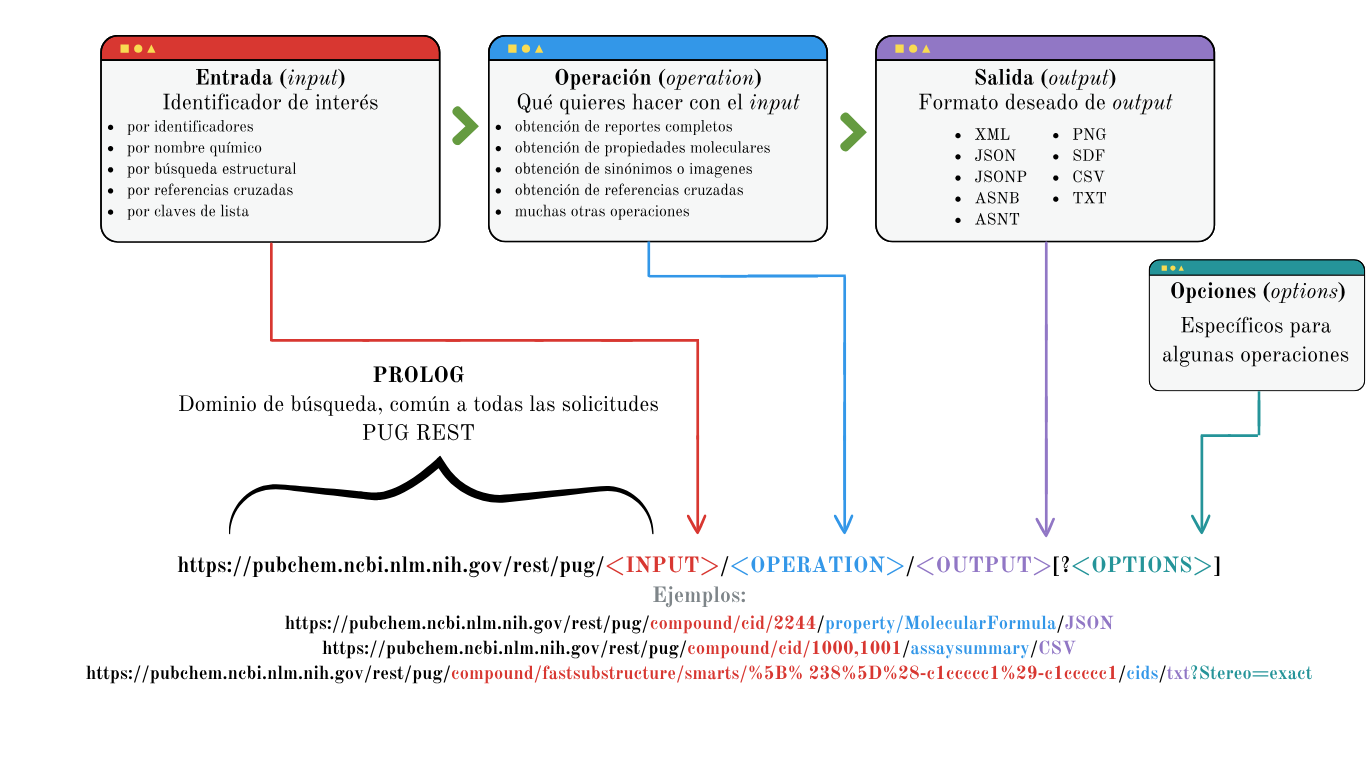

# Ejercicios resueltos

---



A continuación, se muestran ejemplos con dos enfoques principales, mostrar la búsqueda, formato e información que se puede llegar a adquirir en PUG-REST, y por otra parte diversas vías para la adquisición de datos por medio del lenguaje de programación de Pyton, en la plataforma de Google Colaboratory

Para el proceso de adquisición de datos de PubChem por medio de PUG-REST, utilizaremos las siguientes paqueterías.

* [RDKit](https://www.rdkit.org/): contiene herramientas de código abierto para aplicaciones en quimioinformática.
[Matplotlib](https://matplotlib.org/): empleada para la creación de visualizaciones estáticas, animadas o interactivas en Python

* [Sys]( https://docs.python.org/3/library/sys.html):
tiene como función proveer de un varias funciones y variables usadas para manipular las diferentes partes del entorno de ejecución en Python.

* [Os]( https://www.geeksforgeeks.org/os-module-python-examples/):
empleada para interacción con los sistemas operativos y sus archivos de manera sencilla.

* [NumPy](https://numpy.org/about/):
Empleada en funciones matemáticas, generación de números aleatorios, transformaciones de Fourier, etc.

* [Pandas]( https://pandas.pydata.org/):
Basada en NumPy, es empleada en el análisis de datos, al ser una herramienta poderosa de manipulación de datos, al proveer estructuras de datos, manipulación de tablas numéricas, etc.

* [Time](https://docs.python.org/3/library/time.html):
Empleada en funciones de tiempo, al proveer varias funciones sobre este o afines, como por ejemplo “*datatime*”, “*calendar*” , “*strptime()*”, etc.

* [urllib.request]( https://docs.python.org/3/library/urllib.request.html):
Empleada para abrir URLs (mayormente de formato HTTP), al ser capaz de procesar autentificaciones, redireccionamientos, cookies, etc., pose funciones.

In [1]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 13.8 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import RDConfig
from rdkit import rdBase
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem import Draw

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')

import time
from pathlib import Path
from urllib.parse import quote

from IPython.display import Markdown, Image
import requests
import urllib.request
import io

HERE = Path(_dh[-1])
DATA = HERE / "data"

## 1- Obtener CID de un compuesto a partir de su nombre

*1.1* Obtener el CID del ácido shikímico por medio de
su nombre.

Se define el dominio de búsqueda que no se altera como *prolog* e se van agregando las especificaciones de búsqueda (INPUT, Operación y OUTPUT).

In [ ]:

# input =  "compund/name/{name}"
# operation =  "cids"
# output =  "txt"

prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug' #Fijar el dominio de búsqueda que no se altera

name = 'benzylpiperidine'
url = prolog + "/compound/name/"+ name + "/cids/txt"
r = requests.get(url)
cids = r.text.split()
print("PubChem CID for benzylpiperidine is:", cids)
#print(cids)

data = pd.read_csv(url)
data

PubChem CID for benzylpiperidine is: ['76190']


,76190


In [ ]:
url

'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/benzylpiperidine/cids/txt'

In [ ]:
# prompt: obtener el smiles de los codigos anteriores

def get_smiles_from_cid(cid):
  prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'
  url = prolog + f'/compound/cid/{cid}/property/CanonicalSMILES/TXT'
  r = requests.get(url)
  smiles = r.text.strip()
  return smiles

cids = ['117597', '1191', '26893']
smiles_list = []
for cid in cids:
    smiles = get_smiles_from_cid(cid)
    smiles_list.append(smiles)
    print(f"SMILES for CID {cid}: {smiles}")




SMILES for CID 117597: CCCCCCCCCCCCN=C(N(C)C)N(C)C
SMILES for CID 1191: C1=NC2=C(N1C3C(C(C(O3)COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O)O)NC(=O)NC2=O
SMILES for CID 26893: CC(C)C1=CC=C(C=C1)C(CCN(C)C)(C#N)C(C)C


In [ ]:
# prompt: Identifique compuestos que contienen la palabra “benzylpiperidine” como parte de su nombre. Para realizar esta búsqueda se pueden establecer los siguientes criterios:
# input =  "compund/name/{name}"
# operation =  "cids"
# output =  "txt"
# options= ?name_type=word
# a)	Indique la URL para realizar esta búsqueda:
# b)	Utilice la función len para saber cuántos compuestos se obtienen con esta búsqueda e indique el número obtenido:
# c)	Corrobore esta información entrando a Entrez (https://www.ncbi.nlm.nih.gov/pccompound/) en búsqueda avanzada y usando el índice [synonym]. Muestre una captura de pantalla de su búsqueda.

from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import RDConfig
from rdkit import rdBase
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem import Draw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import time
from pathlib import Path
from urllib.parse import quote
from IPython.display import Markdown, Image
import requests
import urllib.request
import io
!pip install rdkit


%matplotlib inline
sys.path.append('/usr/local/lib/python3.7/site-packages/')



HERE = Path(_dh[-1])
DATA = HERE / "data"

prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug' #Fijar el dominio de búsqueda que no se altera
name = 'benzylpiperidine'
url = prolog + "/compound/name/"+ name + "/cids/txt?name_type=word" # a) URL for the search
r = requests.get(url)
cids = r.text.split()
print("PubChem CIDs for compounds containing benzylpiperidine:", cids)

num_compounds = len(cids) # b) Number of compounds
print("Number of compounds:", num_compounds)

def get_smiles_from_cid(cid):
  prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'
  url = prolog + f'/compound/cid/{cid}/property/CanonicalSMILES/TXT'
  r = requests.get(url)
  smiles = r.text.strip()
  return smiles

# Example usage (only for showing SMILES and to verify the IDs)
smiles_list = []
for cid in cids[0:10]: # show only the first 3 SMILES
    smiles = get_smiles_from_cid(cid)
    smiles_list.append(smiles)
    print(f"SMILES for CID {cid}: {smiles}")

sample = pd.DataFrame({'SMILES': smiles_list}, index=cids[0:10])
sample.to_csv('sample.csv')
sample
url

PubChem CIDs for compounds containing benzylpiperidine: ['137891171', '126796392', '46737041', '17749762', '1201373', '1201372', '76190', '10514651', '71742014', '15295827', '19696502', '16232225', '89584', '16187876', '90423', '16218271', '415852', '11950907', '10800527', '91664057', '984913', '677406', '24904396', '11138174', '17389817', '112758015', '2838690', '17915995', '19035855', '20664719', '1284164', '28162048', '10680206', '11830614', '10847266', '53410820', '59509446', '18525933', '11436222', '53302252', '16947663', '94006022', '15234421', '137971793', '13497933', '1179281', '12316086', '1299893', '3868064', '2843630', '577225', '10687441', '67726841', '299608', '12594498', '21843371', '12594483', '2736370', '207956', '783156', '4714983', '71802806', '16244010', '49674540', '45075017', '2846102', '8554569', '66650234', '86810490', '13090242', '31737', '18425738', '13857550', '10443988', '2841641', '49733493', '45501511', '3044632', '2942010', '984865', '91814050', '86276750'

'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/benzylpiperidine/cids/txt?name_type=word'

In [ ]:
# prompt: Obtenga un archivo csv con los SMILES canónicos de al menos 10 compuestos identificados en el punto anterior. Adicionalmente, puede agregar otras propiedades, incluya ensayos

def get_properties_from_cid(cid):
    prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'
    url = prolog + f'/compound/cid/{cid}/property/CanonicalSMILES,MolecularWeight,TPSA,XLogP,HBondDonorCount,HBondAcceptorCount/JSON'
    r = requests.get(url)
    if r.status_code == 200:
        try:
            data = r.json()
            properties = data['PropertyTable']['Properties'][0]
            return properties
        except (KeyError, IndexError, ValueError):
            return None
    else:
        return None

# Get properties for the first 10 CIDs
properties_list = []
for cid in cids[:10]:
    properties = get_properties_from_cid(cid)
    if properties:
      properties['CID'] = cid # Add CID to the properties dictionary
      properties_list.append(properties)
    else:
        print(f"Could not retrieve properties for CID: {cid}")

# Convert to a Pandas DataFrame
df = pd.DataFrame(properties_list)

# Add assays
assays = []
for cid in df['CID']:
    url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/assaysummary/JSON'
    r = requests.get(url)
    if r.status_code == 200:
      try:
        data = r.json()
        if 'AssaySummaryList' in data and 'AssaySummary' in data['AssaySummaryList'] :
          assay_count = len(data['AssaySummaryList']['AssaySummary'])
          assays.append(assay_count)
        else:
          assays.append(0)
      except:
        assays.append(0)
    else:
      assays.append(0)

df['Assay Count'] = assays

# Save to CSV
csv_file_path = 'compounds_data.csv'
df.to_csv(csv_file_path, index=False)
print(f"Data saved to {csv_file_path}")

url


Data saved to compounds_data.csv


'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/15295827/assaysummary/JSON'

In [ ]:
# prompt: para los cids adapta este codigo: input = '/compound/cid/{cid}'
# operation = '/property/CanonicalSMILES,MolecularWeight,TPSA,XLogP,HBondDonorCount,HBondAcceptorCount '
# output = '/CSV'
# url = prolog + input + operation + output
# df_1 = pd.read_csv(url)
# df_1

import pandas as pd
import requests

prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'

def get_properties_for_cids(cids):
  """Retrieves properties for a list of CIDs from PubChem.

  Args:
    cids: A list of PubChem CIDs (strings).

  Returns:
    A pandas DataFrame containing the retrieved properties, or None if an error occurs.
  """
  properties_list = []
  for cid in cids:
    url = prolog + f'/compound/cid/{cid}/property/CanonicalSMILES,MolecularWeight,TPSA,XLogP,HBondDonorCount,HBondAcceptorCount/JSON'
    r = requests.get(url)
    if r.status_code == 200:
      try:
        data = r.json()
        properties = data['PropertyTable']['Properties'][0]
        properties['CID'] = cid  # Add CID to the properties dictionary
        properties_list.append(properties)
      except (KeyError, IndexError, ValueError):
        print(f"Could not retrieve properties for CID: {cid}")
        # Handle the error as needed, e.g., skip the CID or return an error.
        continue #Skip to the next cid
    else:
      print(f"Error retrieving data for CID {cid}: Status code {r.status_code}")
      continue #Skip to the next cid

  if properties_list:
    return pd.DataFrame(properties_list)
  else:
    return None


# Example usage:
cids_to_process = ['117597', '1191', '26893'] # Example list of CIDs
df_properties = get_properties_for_cids(cids_to_process)

if df_properties is not None:
  print(df_properties)
  # Further processing of the DataFrame...
else:
  print("No properties data could be retrieved.")


      CID MolecularWeight                                    CanonicalSMILES  \
0  117597           283.5                        CCCCCCCCCCCCN=C(N(C)C)N(C)C   
1    1191          524.17  C1=NC2=C(N1C3C(C(C(O3)COP(=O)(O)OP(=O)(O)OP(=O...   
2   26893           272.4             CC(C)C1=CC=C(C=C1)C(CCN(C)C)(C#N)C(C)C   

   XLogP   TPSA  HBondDonorCount  HBondAcceptorCount  
0    5.4   18.8                0                   1  
1   -6.2  286.0                8                  16  
2    4.3   27.0                0                   2  


In [ ]:
import pandas as pd
import requests

prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'
input = '/compound/cid/{cid}'
operation = '/property/CanonicalSMILES,MolecularWeight,TPSA,XLogP,HBondDonorCount,HBondAcceptorCount'
output = '/CSV'

# Join the first 10 CIDs into a comma-separated string
cid_string = ','.join(cids[:10])

# Build the URL with the comma-separated CIDs
url = prolog + input.format(cid=cid_string) + operation + output
print(url)

# Now, you can read the CSV from the corrected URL
df_2 = pd.read_csv(url)
df_2

https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/137891171,126796392,46737041,17749762,1201373,1201372,76190,10514651,71742014,15295827/property/CanonicalSMILES,MolecularWeight,TPSA,XLogP,HBondDonorCount,HBondAcceptorCount/CSV


,CID,CanonicalSMILES,MolecularWeight,TPSA,XLogP,HBondDonorCount,HBondAcceptorCount
0,137891171,C1CCNC(C1)CC2=CC=CC=C2.Cl,211.73,12.0,NaN,2,1
1,126796392,CC(=O)O.C1CN(CCC1C(=N)N)CC2=CC=CC=C2,277.36,90.4,NaN,3,4
2,46737041,C1CNCCC1(CC2=CC=CC=C2)C(=O)O.Cl,255.74,49.3,NaN,3,3
3,17749762,CCOC(=O)C1(CCCNC1)CC2=CC=CC=C2.Cl,283.79,38.3,NaN,2,3
4,1201373,C1CCNC(C1)CC2=CC=CC=C2,175.27,12.0,2.7,1,1
5,1201372,C1CCNC(C1)CC2=CC=CC=C2,175.27,12.0,2.7,1,1
6,76190,C1CCN(CC1)CC2=CC=CC=C2,175.27,3.2,2.6,0,1
7,10514651,CCOC(=O)C1(CCCNC1)CC2=CC=CC=C2,247.33,38.3,2.3,1,3
8,71742014,COC(=O)C1CN(CCC1N)CC2=CC=CC=C2.Cl,284.78,55.6,NaN,2,4
9,15295827,C1CN(CCC1(CCO)CCO)CC2=CC=CC=C2,263.37,43.7,1.7,2,3


In [ ]:
# prompt: Indique la URL para realizar esta búsqueda y descargar el CSV

prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'
name = 'benzylpiperidine'
url = prolog + "/compound/name/"+ name + "/cids/txt?name_type=word"
url


'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/benzylpiperidine/cids/txt?name_type=word'

##2- Obtener CID de un compuesto a partir de su estructura

2.1 Obtener el CID del ácido shikímico por medio de su SMILES

In [ ]:
# input = "/compound/smiles/C1C(C(C(C=C1C(=O)O)O)O)O"
# operation = '/cids/'
# output = "txt"

prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'
url = prolog + "/compound/smiles/" + "C1C(C(C(C=C1C(=O)O)O)O)O" + "/cids/TXT"
res = requests.get(url)
cids = res.text.split()
print("PubChem CID for Shikimic Acid is:", cids)

PubChem CID for Shikimic Acid is: ['1094']


Nota: los SMILES y los SMARTS contienen caracteres como: /, ] , @ , [, que afectan el código de una URL. En algunos casos será necesario colocar los SMARTS o SMILES en formato de URL

In [ ]:
# input = "/compound/smiles/CCCCCCCCCCCCOS%28%3DO%29%28%3DO%29%5BO-%5D.%5BNa%2B%5D"
# operation = '/cids/'
# output = "txt"

import urllib.parse  #convierte texto en formato URL
molecule = 'C1CCN(CC1)CC2=CC=CC=C2'
molecule_url= urllib.parse.quote(molecule)

prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'
url = prolog + "/compound/smiles/" + molecule_url + "/cids/TXT"
res = requests.get(url)
cids = res.text.split()
print("PubChem CID for molecule is:", cids)
url

PubChem CID for molecule is: ['76190']


'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/C1CCN%28CC1%29CC2%3DCC%3DCC%3DC2/cids/TXT'

2.2 Obtener el SMILES del ácido skikímico por medio de su CID

In [ ]:
# input =  "/compound/cid/{cid}"
# operation =  "property/CanonicalSMILES/"
# output =  "JSON"
cid = "8742"
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/CanonicalSMILES/JSON"

r = requests.get(url)
r.raise_for_status()
response = r.json()

if "PropertyTable" in response:
    canonical_SMILES = response["PropertyTable"]["Properties"][0]["CanonicalSMILES"]
else:
    raise ValueError(f"Could not find matches for PubChem CID: {cid}")
print(f"Canonical SMILES for {name} is:\n{canonical_SMILES}")

Canonical SMILES for benzylpiperidine is:
C1C(C(C(C=C1C(=O)O)O)O)O


##3- Obtener número de CIDs de una fórmula molecular

3.1 Obtener el número de CIDs de una misma fórmula molecular (C7H10O5, fórmula molecular del ácido shikímico).


In [ ]:
# input = '/compound/fastformula/C7H10O5'
# operation = '/cids/'
# output = "txt"
query = 'C7H10O5'    # Molecular formula for Cres
url = prolog + "/compound/fastformula/"+ query + "/cids/txt"
res = requests.get(url)
cids = res.text.split()
print("# Number of CIDs:", len(cids))
#print(cids)


# Number of CIDs: 1391


Es posible permitir a otros elementos estar presentes al agregarlos a la fórmula especificada, como se muestra a continuación

In [ ]:
url = prolog + "/compound/fastformula/"+ query + "/cids/txt?AllowOtherElements=true"
res = requests.get(url)
cids = res.text.split()
print("# Number of CIDs:", len(cids))
#print(cids)


# Number of CIDs: 3415


##4- Obtener estructura 2D de un compuesto químico

4.1 Obtener la estructura 2D del ácido shikímico por medio de su CID

The 2D structure of Shikimic Acid:

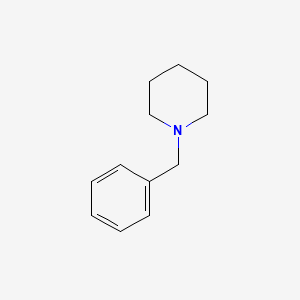

In [ ]:
# input =  "/compound/cid/{cid}/"
# output =  "PNG"
cid = "76190"
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/PNG"

r = requests.get(url)
r.raise_for_status()

display(Markdown("The 2D structure of Shikimic Acid:"))
display(Image(r.content))

##5- Obtener propiedades a partir de CID

5.1 Obtener el peso molecular para el ácido shikímico por medio de su CID

In [ ]:
# input =  "/compound/cid/{cid}"
# operation =  "property/MolecularWeight/"
# output =  "JSON"

url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/MolecularWeight/JSON"

r = requests.get(url)
r.raise_for_status()
response = r.json()

if "PropertyTable" in response:
    mol_weight = response["PropertyTable"]["Properties"][0]["MolecularWeight"]
else:
    raise ValueError(f"Could not find matches for PubChem CID: {cid}")
print(f"Molecular weight for {name} is:\n{mol_weight}")

Molecular weight for benzylpiperidine is:
175.27


##6- Obtener varias propiedades moleculares de diferentes CID

6.1 Obtener las  siguientes propiedades: fórmula molecular, peso molecular y XLogP para el pentano, hexano y heptano, por medio de sus CIDs.
Los CIDS son 8003,8058 y  8900 respectivamente.

In [ ]:
# input = '/compound/cid/8003,8058,8900'
# operation = '/property/MolecularFormula,MolecularWeight,XLogP'
# output = '/CSV'

# Import the library necessary for making a web sevice request.
import urllib.request

# Define variables for PUG-REST request URL pieces.
prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'
input = '/compound/cid/8003,8058,8900'
operation = '/property/MolecularFormula,MolecularWeight,XLogP'
output = '/CSV'

# formulate the PUG-REST request URL
url = prolog + input + operation + output
df1=pd.read_csv(url)

# Print the output.
df1

,CID,MolecularFormula,MolecularWeight,XLogP
0,8003,C5H12,72.15,3.4
1,8058,C6H14,86.18,3.9
2,8900,C7H16,100.20,4.4


Otra manera de obtener las propiedades de fórmula molecular, peso molecular y XLogP para el pentano, hexano y heptano es:

In [ ]:
df=pd.read_csv("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/8003,8058,8900/property/MolecularFormula,MolecularWeight,XlogP/CSV", delimiter=",")
df

,CID,MolecularFormula,MolecularWeight,XLogP
0,8003,C5H12,72.15,3.4
1,8058,C6H14,86.18,3.9
2,8900,C7H16,100.20,4.4


##7- Obtener distintos identificadores químicos y mostrar diferencias en los mismos.

Para una misma fórmula química es posible obtener distintos compuestos, ya sea por su conectividad (isómeros constitucionales) o por el arreglo de los átomos en el espacio (estereoisómeros), en la siguiente Figura, se muestra un poco más a detalle la clasificación de isómeros.
Es importante tener presente esta información, ya que para una estructura se pueden dar varios ids, porque se contemplan los isomeros.



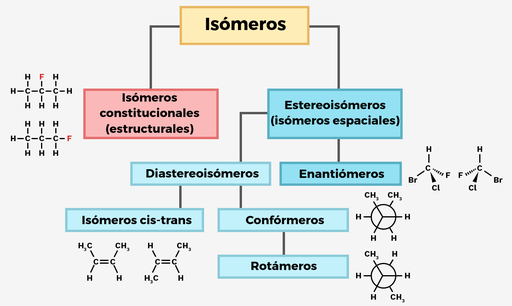

7.1 Obtener los diferentes identificadores para el ácido shikímico

#### Identity_type: same_stereo_isotope
1094 "C1C(C(C(C=C1C(=O)O)O)O)O"


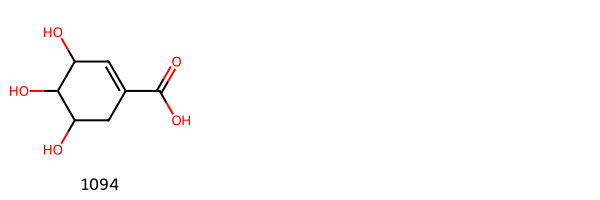

#### Identity_type: same_stereo
1094 "C1C(C(C(C=C1C(=O)O)O)O)O"


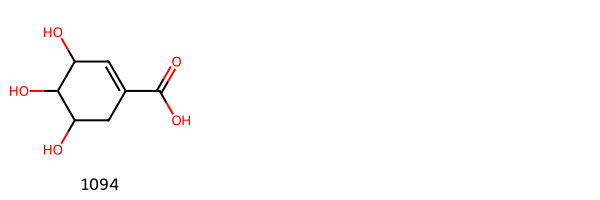

#### Identity_type: same_isotope
1094 "C1C(C(C(C=C1C(=O)O)O)O)O"
8742 "C1[C@H]([C@@H]([C@@H](C=C1C(=O)O)O)O)O"
7076075 "C1[C@@H]([C@@H]([C@H](C=C1C(=O)O)O)O)O"
10986763 "C1[C@@H]([C@H]([C@H](C=C1C(=O)O)O)O)O"
11332752 "C1[C@H]([C@H]([C@@H](C=C1C(=O)O)O)O)O"
11789701 "C1[C@H]([C@@H]([C@H](C=C1C(=O)O)O)O)O"
12315498 "C1[C@H](C([C@@H](C=C1C(=O)O)O)O)O"
12315501 "C1[C@@H]([C@H]([C@@H](C=C1C(=O)O)O)O)O"
16758061 "C1C([C@@H](C(C=C1C(=O)O)O)O)O"
21626190 "C1[C@@H]([C@@H]([C@@H](C=C1C(=O)O)O)O)O"
24202011 "C1[C@@H](C(C(C=C1C(=O)O)O)O)O"
40970370 "C1[C@H]([C@H]([C@H](C=C1C(=O)O)O)O)O"
42626655 "C1[C@H]([C@@H](C(C=C1C(=O)O)O)O)O"
49867941 "C1[C@H](C(C(C=C1C(=O)O)O)O)O"
59081897 "C1C([C@@H]([C@@H](C=C1C(=O)O)O)O)O"
69027491 "C1C(C([C@@H](C=C1C(=O)O)O)O)O"


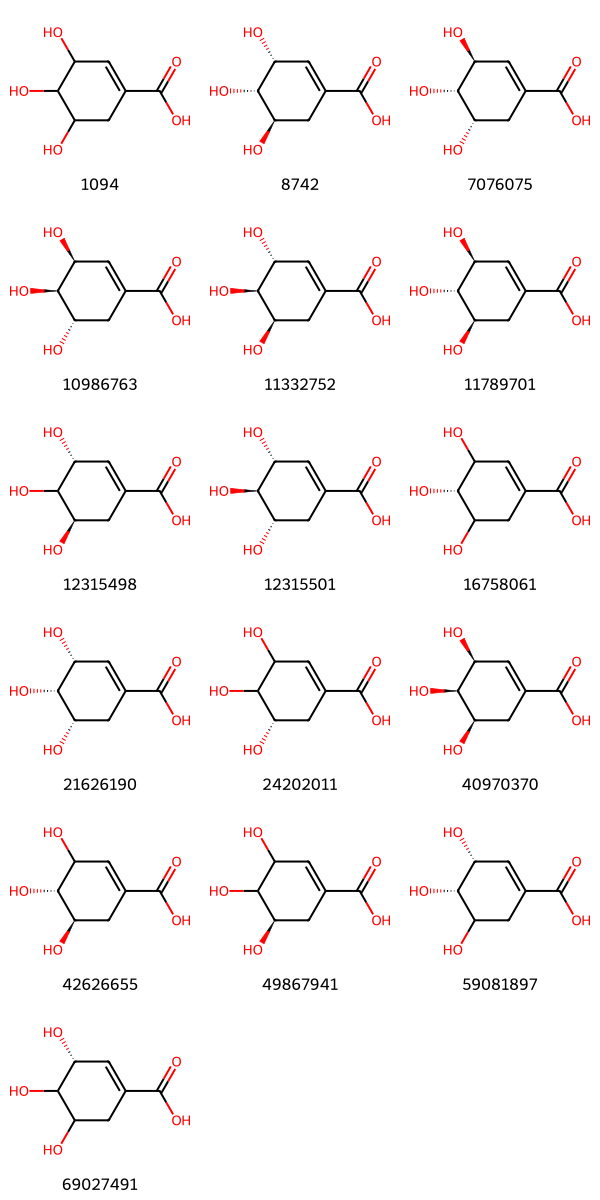

#### Identity_type: same_connectivity
1094 "C1C(C(C(C=C1C(=O)O)O)O)O"
8742 "C1[C@H]([C@@H]([C@@H](C=C1C(=O)O)O)O)O"
7076075 "C1[C@@H]([C@@H]([C@H](C=C1C(=O)O)O)O)O"
9989730 "[H][C@@]1([C@H]([C@@H]([C@@H](C=C1C(=O)O)O)O)O)[2H]"
10103663 "[2H][C@@]1(CC(=C[C@H]([C@H]1O)O)C(=O)O)O"
10986763 "C1[C@@H]([C@H]([C@H](C=C1C(=O)O)O)O)O"
11332752 "C1[C@H]([C@H]([C@@H](C=C1C(=O)O)O)O)O"
11789701 "C1[C@H]([C@@H]([C@H](C=C1C(=O)O)O)O)O"
12315498 "C1[C@H](C([C@@H](C=C1C(=O)O)O)O)O"
12315501 "C1[C@@H]([C@H]([C@@H](C=C1C(=O)O)O)O)O"
16758061 "C1C([C@@H](C(C=C1C(=O)O)O)O)O"
21626190 "C1[C@@H]([C@@H]([C@@H](C=C1C(=O)O)O)O)O"
24202011 "C1[C@@H](C(C(C=C1C(=O)O)O)O)O"
25239957 "[2H]C1[C@H]([C@@H]([C@@H](C=C1C(=O)O)O)O)O"
40970370 "C1[C@H]([C@H]([C@H](C=C1C(=O)O)O)O)O"
42626655 "C1[C@H]([C@@H](C(C=C1C(=O)O)O)O)O"
49867941 "C1[C@H](C(C(C=C1C(=O)O)O)O)O"
59081897 "C1C([C@@H]([C@@H](C=C1C(=O)O)O)O)O"
59869331 "[2H][C@@]1([C@@H](CC(=C[C@H]1O)C(=O)O)O)O"
59869332 "[2H][C@]1(C=C(C[C@H]([C@@H]1O)O)C(=O)O)O"
59869334

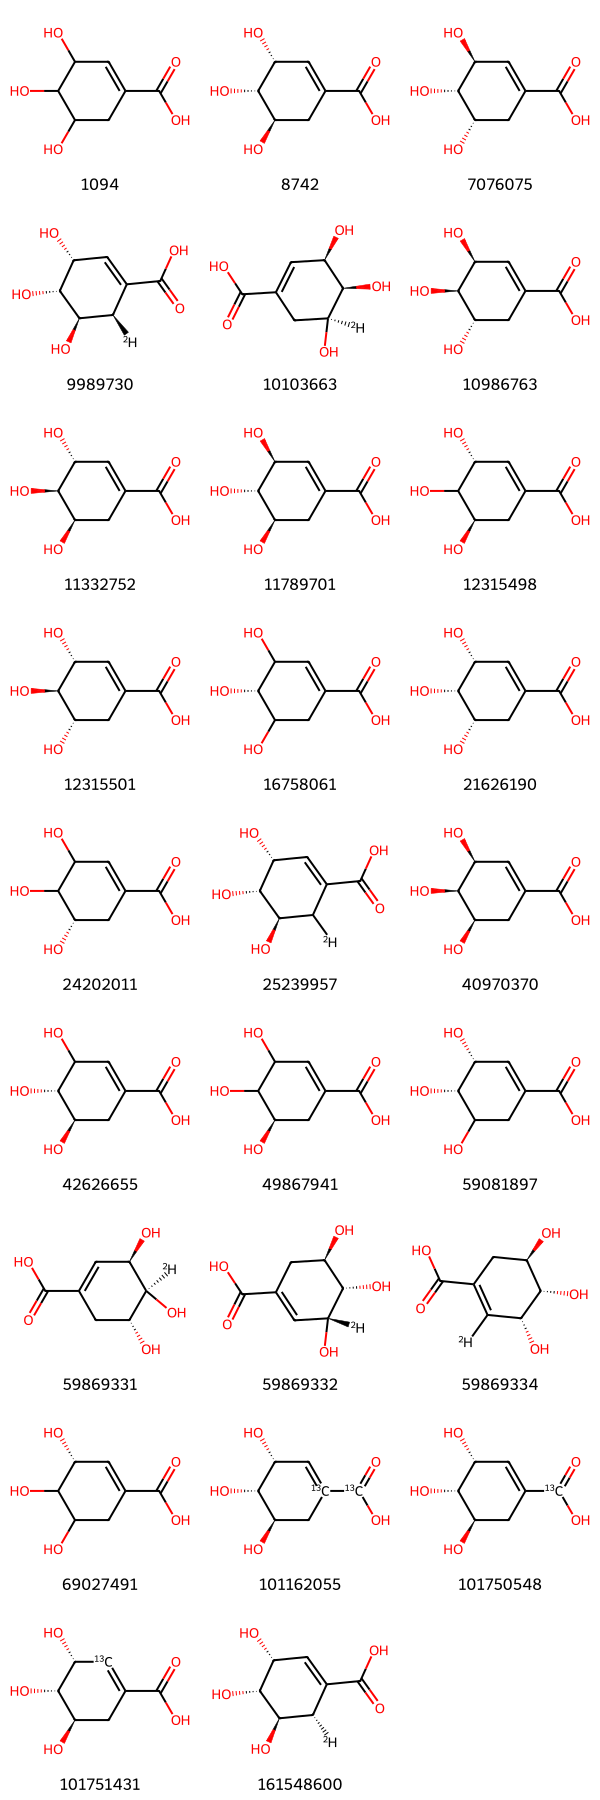

In [ ]:
# input = '/compound/fastidentity/smiles/'
# operation = 'property/isomericsmiles/
# output = 'CSV'
#options = ?identity_type=' + myoption

import requests
import time
import io

from rdkit import Chem
from rdkit.Chem import Draw

prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"

mydata = { 'smiles' : "C1C(C(C(C=C1C(=O)O)O)O)O" }
options = [ 'same_stereo_isotope', # This is the default
            'same_stereo',
            'same_isotope',
            'same_connectivity']

for myoption in ( options ) :

    print("#### Identity_type:", myoption)

    url = prolog + '/compound/fastidentity/smiles/property/isomericsmiles/csv?identity_type=' + myoption
    res = requests.post(url, data=mydata)

    mycids = []
    mysmiles = []

    file = io.StringIO(res.text)
    file.readline()

    for line in file :

        ( cid_tmp, smiles_tmp ) = line.rstrip().split(',')
        print(cid_tmp, smiles_tmp)

        mycids.append( cid_tmp )
        mysmiles.append( smiles_tmp.replace('"',"") )

    mols = []

    for x in mysmiles :

        mol = Chem.MolFromSmiles(x)
        Chem.FindPotentialStereoBonds(mol)
        mols.append(mol)

    img = Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(200,200), legends=mycids)
    display(img)

    time.sleep(0.2)

##8- Obtener ensayos a través de CIDs y AIDs

8.1 Obtener un resumen de los ensayos para el ácido shikímico (CID: 8742)

In [ ]:
# input = '/compound/cid/8742/'
# operation = 'assaysummary'
# output = '/CSV'
df2=pd.read_csv("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/8742/assaysummary/CSV")
df2

,AID,Panel Member ID,SID,CID,Activity Outcome,Target GI,Target GeneID,Activity Value [uM],Activity Name,Assay Name,Assay Type,PubMed ID,RNAi
0,608,NaN,11537762,8742,Inactive,1.714984e+07,2280.0,NaN,NaN,NMR Based Screening Assay for FKBP12,Other,NaN,NaN
1,811,NaN,26528894,8742,Inactive,5.566203e+07,NaN,NaN,NaN,Primary Cell Based High Throughput Screening A...,Screening,NaN,NaN
2,833,NaN,26528894,8742,Inactive,2.578455e+06,29234.0,NaN,NaN,Primary Cell Based High Throughput Screening A...,Screening,NaN,NaN
3,875,NaN,26754400,8742,Inactive,1.390365e+09,NaN,NaN,Potency,qHTS Assay for Inhibitors of BRCT-Phosphoprote...,Confirmatory,NaN,NaN
4,880,NaN,26754400,8742,Inactive,3.290016e+06,6002.0,NaN,NaN,qHTS Assay for Inhibitors of RGS12 GoLoco Moti...,Confirmatory,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1745845,NaN,93576745,8742,Inactive,NaN,6311.0,NaN,Potency,Primary qHTS for Inhibitors of ATXN expression,Confirmatory,35787375.0,NaN
476,1745845,NaN,93576745,8742,Inactive,2.152739e+08,6311.0,NaN,Potency,Primary qHTS for Inhibitors of ATXN expression,Confirmatory,35787375.0,NaN
477,1920062,NaN,93576745,8742,Inactive,NaN,NaN,NaN,NaN,High-throughput screening primary assay to ide...,Screening,NaN,NaN
478,1963987,NaN,223712365,8742,Unspecified,NaN,NaN,NaN,NaN,HIV Cellular Data,Other,NaN,NaN


8.2 Obtener información de la prueba biológica con AID: [608](https://pubchem.ncbi.nlm.nih.gov/bioassay/608))

In [ ]:
# input = 'assay/aid/608/'
# operation = 'assaysummary'
# output = '/CSV'
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/assay/aid/608/csv"
df3=pd.read_csv(url)
print("Url del ensayo consultado:", url)
df3

Url del ensayo consultado: https://pubchem.ncbi.nlm.nih.gov/rest/pug/assay/aid/608/csv


,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Kd
0,RESULT_TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FLOAT
1,RESULT_DESCR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dissociation Constant
2,RESULT_UNIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MICROMOLAR
3,1,26679181.0,16725057.0,COC1=CC(=CC(=C1OC)OC)C(=O)C(=O)N2CCCC[C@H]2C(=...,Active,80.0,http://sdccg.burnham.org,NaN,3
4,2,26679182.0,16725058.0,CC(C)C1=CC=C(C=C1)SCC(=O)O,Inactive,0.0,http://sdccg.burnham.org,NaN,4001
...,...,...,...,...,...,...,...,...,...
3817,3815,11535282.0,1246707.0,CC1=CC(=CS1)C(=O)NC2=CC3=C(C=C2)OCO3,Inactive,0.0,http://sdccg.burnham.org,NaN,4001
3818,3816,11535283.0,1246960.0,CC1=CC(=CS1)C(=O)NCC2=CN=CC=C2,Inactive,0.0,http://sdccg.burnham.org,NaN,4001
3819,3817,11535284.0,1247116.0,CC1=C(C(=NO1)C)C(=O)NC2=CC=CC=C2SC,Inactive,0.0,http://sdccg.burnham.org,NaN,4001
3820,3818,11535285.0,1247253.0,CC1=C(SC(=C1C#N)NC(=O)C2=C(ON=C2C)C)C,Inactive,0.0,http://sdccg.burnham.org,NaN,4001


##9- Ejercicio similitud

Actualmente, PubChem utiliza el [coeficiente de Tanimoto](https://pubchemdocs.ncbi.nlm.nih.gov/about#tanimoto) para la calcular la similitud 2D, mientras que para la similitud 3D utiliza el método [*“atom-centered Gaussian-shape comparison method”*](https://onlinelibrary.wiley.com/doi/abs/10.1002/%28SICI%291096-987X%2819961115%2917%3A14%3C1653%3A%3AAID-JCC7%3E3.0.CO%3B2-K). Si usted desea saber más sobre como se calcula la similitud química en PubChem, consulte el siguiente enlace [Pubchem-similitud](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics_OLCC_(2019)/04%3A_Searching_Databases_for_Chemical_Information/4.04%3A_Searching_PubChem_Using_a_Non-Textual_Query)

La estructura del Cipargamin es:


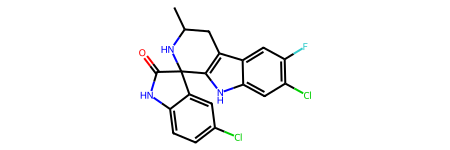

In [ ]:
query = "CC1CC2=C(C3(N1)C4=C(C=CC(=C4)Cl)NC3=O)NC5=CC(=C(C=C25)F)Cl"
print("La estructura del Cipargamin es:")
Chem.MolFromSmiles(query)

In [ ]:
def query_pubchem_for_similar_compounds(smiles, threshold=85, n_records=10):
    escaped_smiles = quote(smiles).replace("/", ".")
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/similarity/smiles/{escaped_smiles}/JSON?threshold={threshold}&MaxRecords={n_records}"
    r = requests.get(url)
    r.raise_for_status()
    key = r.json()["Waiting"]["ListKey"]
    return key

In [ ]:
job_key = query_pubchem_for_similar_compounds(query)
job_key

'1636537502265775157'

In [ ]:
def check_and_download(key, attempts=30):
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/listkey/{key}/cids/JSON"
    print(f"Querying for job {key} at URL {url}...", end="")
    while attempts:
        r = requests.get(url)
        r.raise_for_status()
        response = r.json()
        if "IdentifierList" in response:
            cids = response["IdentifierList"]["CID"]
            break
        attempts -= 1
        print(".", end="")
        time.sleep(10)
    else:
        raise ValueError(f"Could not find matches for job key: {key}")
    return cids

In [ ]:
similar_cids = check_and_download(job_key)

Querying for job 1636537502265775157 at URL https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/listkey/1636537502265775157/cids/JSON...

In [ ]:
def smiles_from_pubchem_cids(cids):
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{','.join(map(str, cids))}/property/CanonicalSMILES/JSON"
    r = requests.get(url)
    r.raise_for_status()
    return [item["CanonicalSMILES"] for item in r.json()["PropertyTable"]["Properties"]]

In [ ]:
similar_smiles = smiles_from_pubchem_cids(similar_cids)

In [ ]:
query_results_df = pd.DataFrame({"smiles": similar_smiles, "CIDs": similar_cids})
PandasTools.AddMoleculeColumnToFrame(query_results_df, smilesCol="smiles")
query_results_df.head(5)

,smiles,CIDs,ROMol
0,CC1CC2=C(C3(N1)C4=C(C=CC(=C4)Cl)NC3=O)NC5=CC(=...,44469321,<rdkit.Chem.rdchem.Mol object at 0x7b3f9682a110>
1,CC1CC2=C(C3(N1)C4=C(C=CC(=C4)Cl)NC3=O)NC5=CC(=...,46179405,<rdkit.Chem.rdchem.Mol object at 0x7b3f96829310>
2,CC1CC2=C(C3(N1)C4=C(C=CC(=C4)Cl)NC3=O)NC5=CC(=...,44251608,<rdkit.Chem.rdchem.Mol object at 0x7b3f96829460>
3,CC1CC2=C(C3(N1)C4=C(C=CC(=C4)Cl)NC3=O)NC5=C2C=...,44469322,<rdkit.Chem.rdchem.Mol object at 0x7b3f9682ad50>
4,CC1CC2=C(C3(N1)C4=C(C=CC(=C4)Cl)NC3=O)NC5=CC=C...,46179404,<rdkit.Chem.rdchem.Mol object at 0x7b3f9682adc0>


In [ ]:
def multi_preview_smiles(query_smiles, query_name, similar_molecules_pd):
    legends = [f"PubChem CID: {str(s)}" for s in similar_molecules_pd["CIDs"].tolist()]
    molecules = [Chem.MolFromSmiles(s) for s in similar_molecules_pd["smiles"]]
    query_smiles = Chem.MolFromSmiles(query_smiles)
    return MolsToGridImage(
        [query_smiles] + molecules,
        molsPerRow=3,
        subImgSize=(300, 300),
        maxMols=len(molecules),
        legends=([query_name] + legends),
        useSVG=True,
    )

The results of querying similar compounds for Shikimic Acid:


/usr/local/lib/python3.11/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:343: UserWarning: Truncating the list of molecules to be displayed to 10. Change the maxMols value to display more.
  warnings.warn(


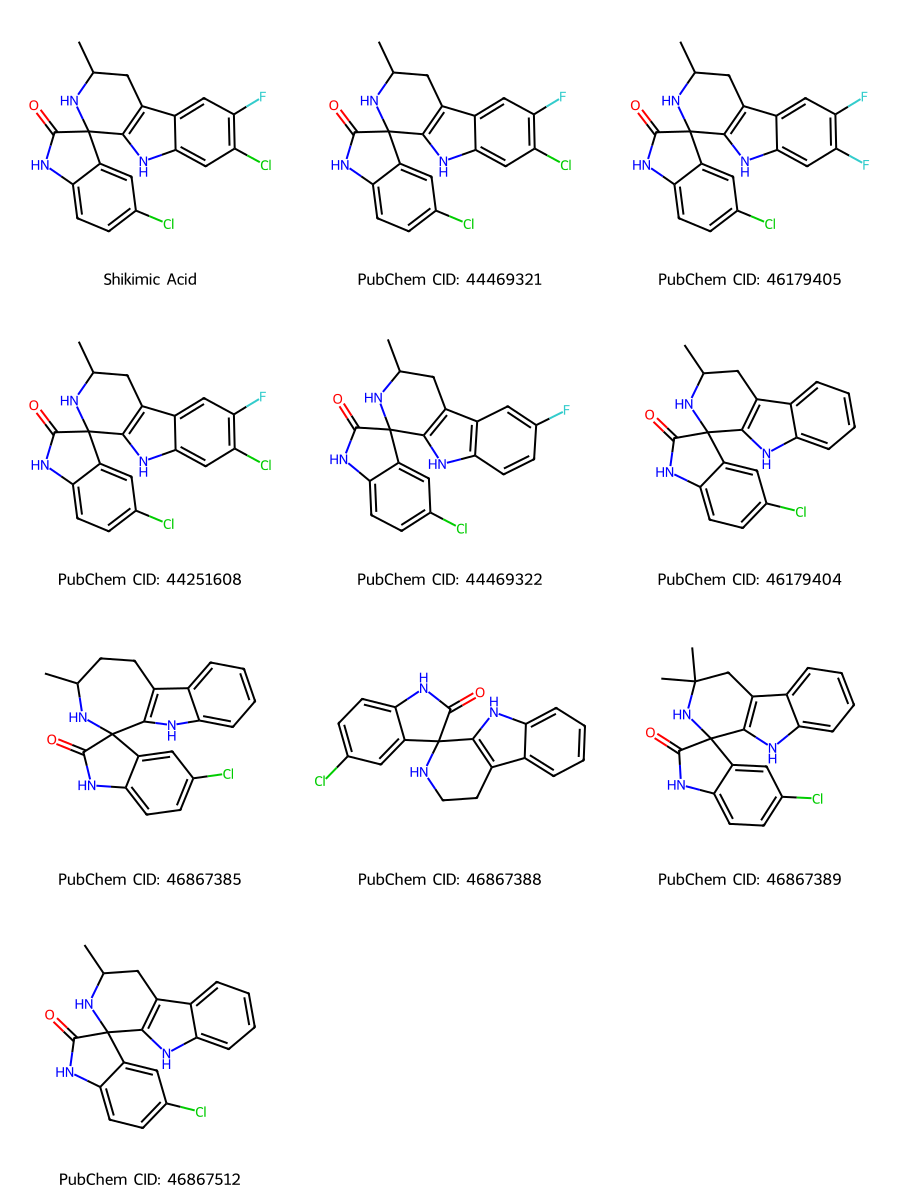

In [ ]:
print("The results of querying similar compounds for Shikimic Acid:")
multi_preview_smiles(query, "Shikimic Acid", query_results_df)

La estructura privilegiada es:


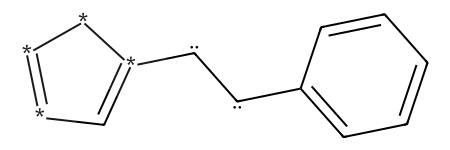

In [ ]:
query_1 = "[#6](-[#6]-*:1:c:*:*:*:1)-c1ccccc1"
print("La estructura privilegiada es:")
Chem.MolFromSmiles(query_1)

In [ ]:
def query_pubchem_for_similar_compounds(smiles, n_records=30):
    escaped_smiles = quote(smiles).replace("/", ".")
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/similarity/smiles/{escaped_smiles}/JSON?MaxRecords={n_records}"
    r = requests.get(url)
    r.raise_for_status()
    key = r.json()["Waiting"]["ListKey"]
    return key

In [ ]:
job_key = query_pubchem_for_similar_compounds(query_1)
job_key

'175860110864057012'

In [ ]:
similar_cids = check_and_download(175860110864057012)

Job key: 571162099434707684
Querying for job 571162099434707684 at URL https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/listkey/571162099434707684/cids/JSON....Similar CIDs: [3365, 55283, 71616, 10215, 3793, 3823, 43234, 4189, 42611257, 47576, 456201, 86173, 91693, 91727, 3198, 3827, 65495, 468595, 5282408, 19371515, 10177, 68553, 10382701, 10471670, 6436173, 6336, 86132, 37175, 164676, 6918485]
The results of querying compounds containing the privileged structure:


/usr/local/lib/python3.11/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:343: UserWarning: Truncating the list of molecules to be displayed to 30. Change the maxMols value to display more.
  warnings.warn(


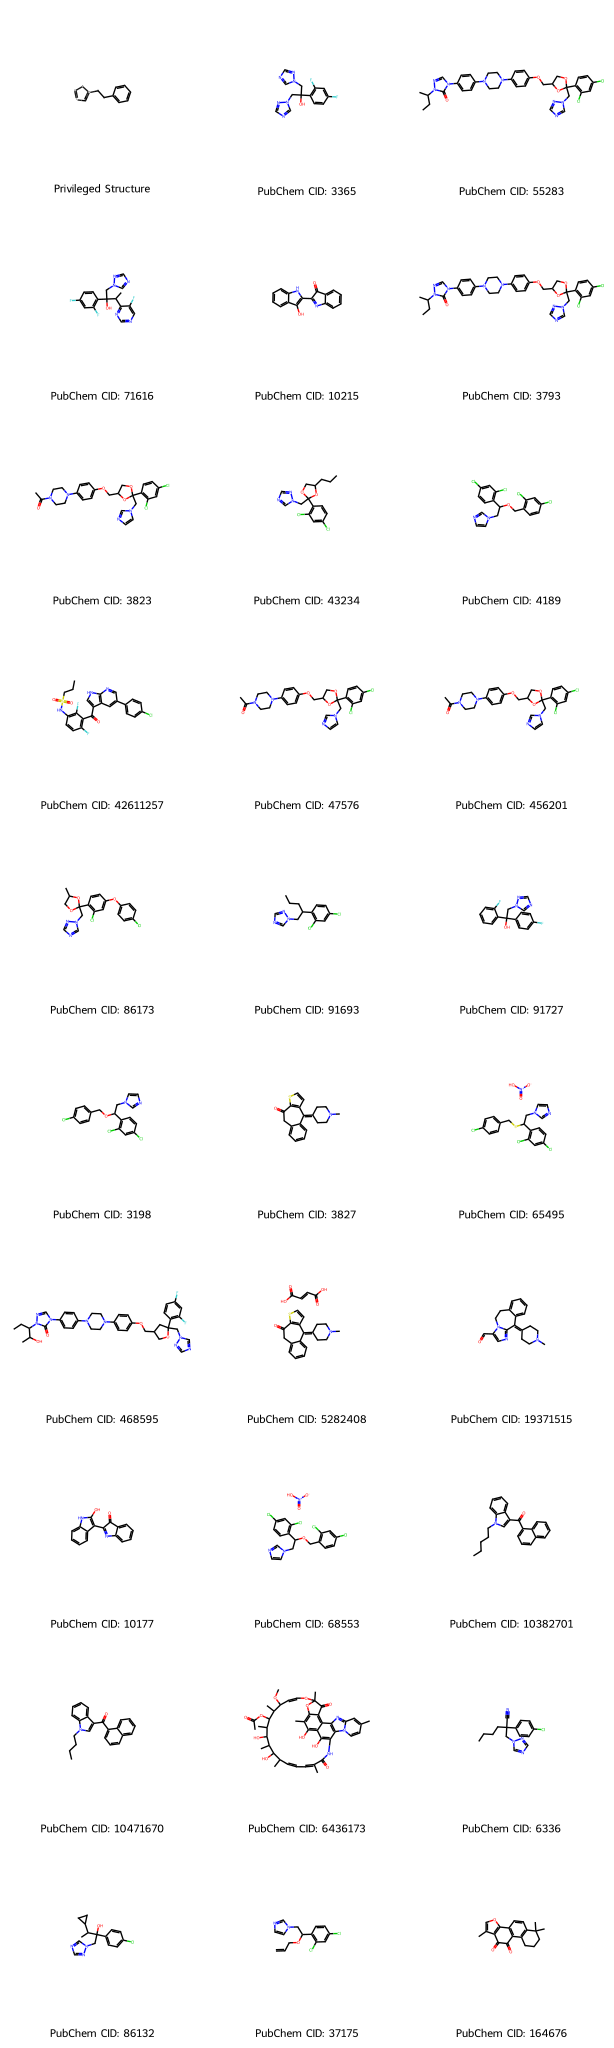

In [ ]:
# prompt: Realice una búsqueda de compuestos que contengan como subestructura la estructuras privilegiadas definida en la celda anterior

def query_pubchem_for_substructure(smiles, n_records=30):
    escaped_smiles = quote(smiles).replace("/", ".")
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/substructure/smiles/{escaped_smiles}/JSON?MaxRecords={n_records}"
    r = requests.get(url)
    r.raise_for_status()
    key = r.json()["Waiting"]["ListKey"]
    return key

job_key = query_pubchem_for_substructure(query)
print(f"Job key: {job_key}")

def check_and_download_substructure(key, attempts=30):
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/listkey/{key}/cids/JSON"
    print(f"Querying for job {key} at URL {url}...", end="")
    while attempts:
        r = requests.get(url)
        r.raise_for_status()
        response = r.json()
        if "IdentifierList" in response:
            cids = response["IdentifierList"]["CID"]
            break
        attempts -= 1
        print(".", end="")
        time.sleep(10)
    else:
        raise ValueError(f"Could not find matches for job key: {key}")
    return cids

similar_cids = check_and_download_substructure(job_key)
print(f"Similar CIDs: {similar_cids}")

similar_smiles = smiles_from_pubchem_cids(similar_cids)

query_results_df = pd.DataFrame({"smiles": similar_smiles, "CIDs": similar_cids})
PandasTools.AddMoleculeColumnToFrame(query_results_df, smilesCol="smiles")

print("The results of querying compounds containing the privileged structure:")
multi_preview_smiles(query, "Privileged Structure", query_results_df)


In [ ]:
# prompt: de la celda anterior dame la URL valida para revisar los compuestos similares a la estructura privilegiada

def query_pubchem_for_substructure(smiles, n_records=30):
    escaped_smiles = quote(smiles).replace("/", ".")
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/substructure/smiles/{escaped_smiles}/JSON?MaxRecords={n_records}"
    r = requests.get(url)
    r.raise_for_status()
    key = r.json()["Waiting"]["ListKey"]
    return url # Return the URL

# Example usage (replace with your actual smiles string)
query_1 = "[#6](-[#6]-*:1:c:*:*:*:1)-c1ccccc1"
url = query_pubchem_for_substructure(query_1)
url


'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/substructure/smiles/%5B%236%5D%28-%5B%236%5D-%2A%3A1%3Ac%3A%2A%3A%2A%3A%2A%3A1%29-c1ccccc1/JSON?MaxRecords=30'

In [ ]:
import pandas as pd
!pip install requests # Install the requests library
import requests

# Your list of CIDs
cids = [3365, 55283, 71616, 10215, 3793, 3823, 43234, 4189, 42611257, 47576, 456201, 86173, 91693, 91727, 3198, 3827, 65495, 468595, 5282408, 19371515, 10177, 68553, 10382701, 10471670, 6436173, 6336, 86132, 37175, 164676, 6918485]

# Construct the URL with comma-separated CIDs
cids_str = ",".join(map(str, cids)) # Convert list of CIDs to comma-separated string
prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
input_path = f"/compound/cid/{cids_str}" # Use f-string to format the input path
operation = "/property//CanonicalSMILES,MolecularFormula,MolecularWeight,XLogP,HBondDonorCount,TPSA,HBondAcceptorCount"
output = "/CSV"

# Create the complete URL
url = prolog + input_path + operation + output

# Read the data into a pandas DataFrame
df_5 = pd.read_csv(url)
df_5

,CID,CanonicalSMILES,MolecularFormula,MolecularWeight,XLogP,HBondDonorCount,TPSA,HBondAcceptorCount
0,3365,C1=CC(=C(C=C1F)F)C(CN2C=NC=N2)(CN3C=NC=N3)O,C13H12F2N6O,306.27,0.4,1,81.7,7
1,55283,CCC(C)N1C(=O)N(C=N1)C2=CC=C(C=C2)N3CCN(CC3)C4=...,C35H38Cl2N8O4,705.60,5.7,0,101.0,9
2,71616,CC(C1=NC=NC=C1F)C(CN2C=NC=N2)(C3=C(C=C(C=C3)F)F)O,C16H14F3N5O,349.31,1.5,1,76.7,8
3,10215,C1=CC=C2C(=C1)C(=C(N2)C3=NC4=CC=CC=C4C3=O)O,C16H10N2O2,262.26,2.7,2,65.5,3
4,3793,CCC(C)N1C(=O)N(C=N1)C2=CC=C(C=C2)N3CCN(CC3)C4=...,C35H38Cl2N8O4,705.60,5.7,0,101.0,9
5,3823,CC(=O)N1CCN(CC1)C2=CC=C(C=C2)OCC3COC(O3)(CN4C=...,C26H28Cl2N4O4,531.40,4.3,0,69.1,6
6,43234,CCCC1COC(O1)(CN2C=NC=N2)C3=C(C=C(C=C3)Cl)Cl,C15H17Cl2N3O2,342.20,3.5,0,49.2,4
7,4189,C1=CC(=C(C=C1Cl)Cl)COC(CN2C=CN=C2)C3=C(C=C(C=C...,C18H14Cl4N2O,416.10,5.3,0,27.1,2
8,42611257,CCCS(=O)(=O)NC1=C(C(=C(C=C1)F)C(=O)C2=CNC3=C2C...,C23H18ClF2N3O3S,489.90,5.0,2,100.0,7
9,47576,CC(=O)N1CCN(CC1)C2=CC=C(C=C2)OCC3COC(O3)(CN4C=...,C26H28Cl2N4O4,531.40,4.3,0,69.1,6


In [ ]:
# prompt: muestra la url

url


'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/3365,55283,71616,10215,3793,3823,43234,4189,42611257,47576,456201,86173,91693,91727,3198,3827,65495,468595,5282408,19371515,10177,68553,10382701,10471670,6436173,6336,86132,37175,164676,6918485/property//CanonicalSMILES,MolecularFormula,MolecularWeight,XLogP,HBondDonorCount,TPSA,HBondAcceptorCount/CSV'

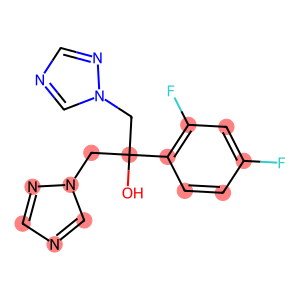

Substructure found in molecule with CID: 3365


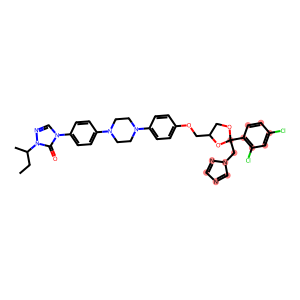

Substructure found in molecule with CID: 55283


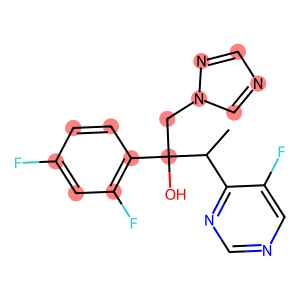

Substructure found in molecule with CID: 71616


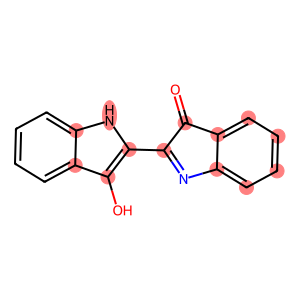

Substructure found in molecule with CID: 10215


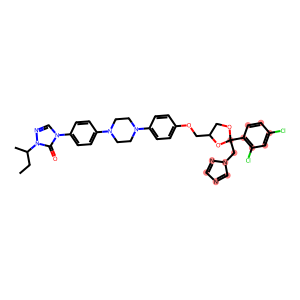

Substructure found in molecule with CID: 3793


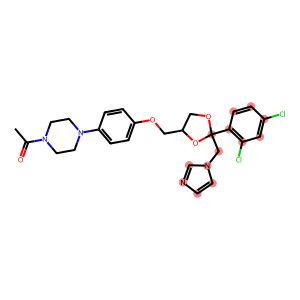

Substructure found in molecule with CID: 3823


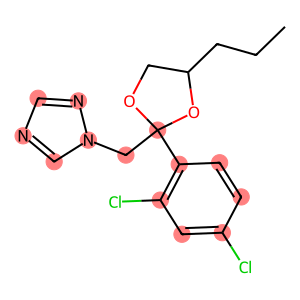

Substructure found in molecule with CID: 43234


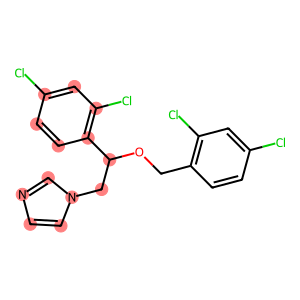

Substructure found in molecule with CID: 4189
Substructure not found in molecule with CID: 42611257


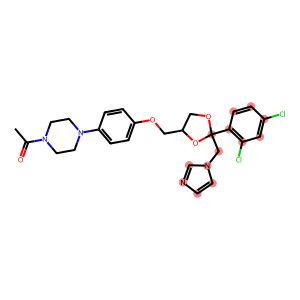

Substructure found in molecule with CID: 47576


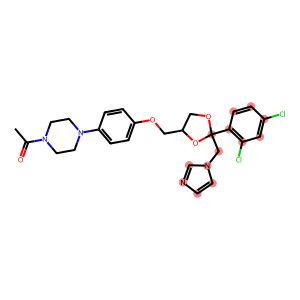

Substructure found in molecule with CID: 456201


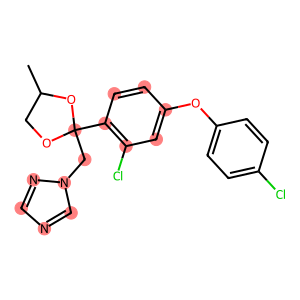

Substructure found in molecule with CID: 86173


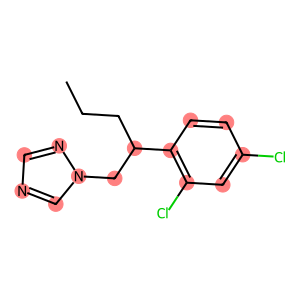

Substructure found in molecule with CID: 91693


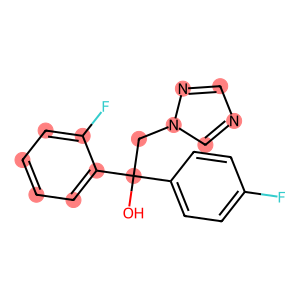

Substructure found in molecule with CID: 91727


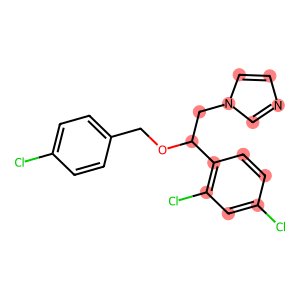

Substructure found in molecule with CID: 3198


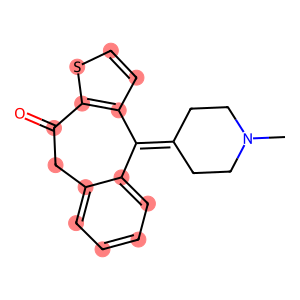

Substructure found in molecule with CID: 3827


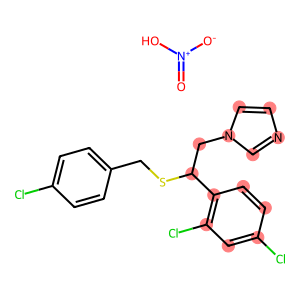

Substructure found in molecule with CID: 65495


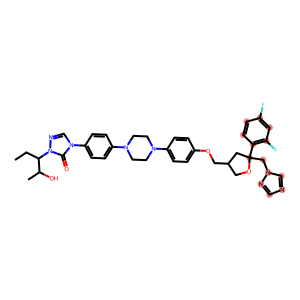

Substructure found in molecule with CID: 468595


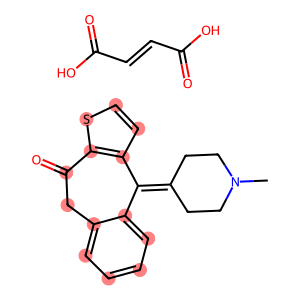

Substructure found in molecule with CID: 5282408


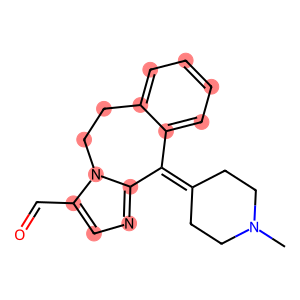

Substructure found in molecule with CID: 19371515


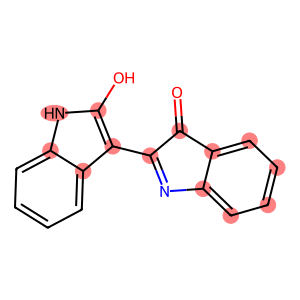

Substructure found in molecule with CID: 10177


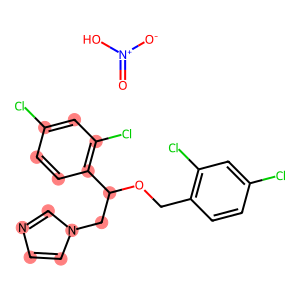

Substructure found in molecule with CID: 68553
Substructure not found in molecule with CID: 10382701
Substructure not found in molecule with CID: 10471670
Substructure not found in molecule with CID: 6436173


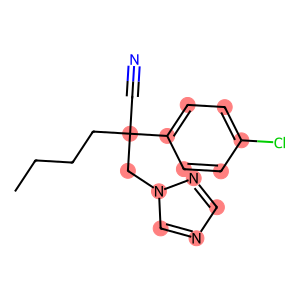

Substructure found in molecule with CID: 6336


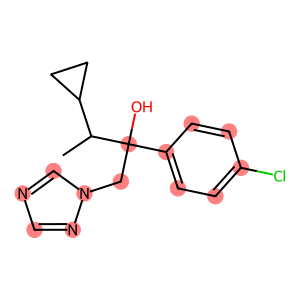

Substructure found in molecule with CID: 86132


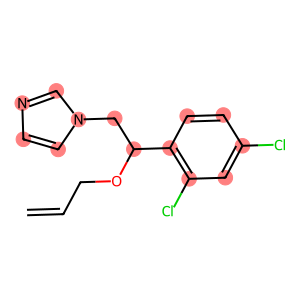

Substructure found in molecule with CID: 37175


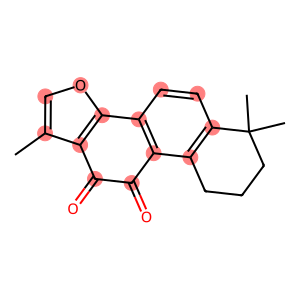

Substructure found in molecule with CID: 164676


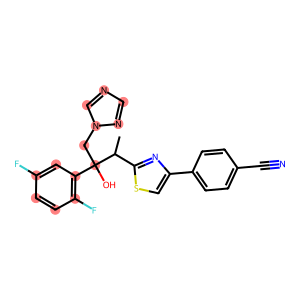

Substructure found in molecule with CID: 6918485


In [ ]:
# prompt: de la columna de df_5, usando sm = 'C1=CC=C(C=C1)C(C2=CC=CC=C2)(C3=CC=CC=C3)N4C=CN=C4'
# m = Chem.MolFromSmiles(sm)
# m, substructure = Chem.MolFromSmarts('c1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1')
# print(m.GetSubstructMatches(substructure))
# m, resalta la subestructura en los compuesto de df_5.canonical_SMILES

sm = '[#6](-[#6]-*:1:c:*:*:*:1)-c1ccccc1'
m = Chem.MolFromSmiles(sm)
substructure = Chem.MolFromSmarts('[#6](-[#6]-*:1:c:*:*:*:1)-c1ccccc1')

#Highlight the substructure in the compounds of df_5.canonical_SMILES
for index, row in df_5.iterrows():
    mol = Chem.MolFromSmiles(row['CanonicalSMILES'])
    if mol is not None:
      matches = mol.GetSubstructMatches(substructure)
      if matches:
          highlighted_mol = Draw.MolToImage(mol, highlightAtoms=matches[0]) # Highlight only the first match
          display(highlighted_mol)
          print(f"Substructure found in molecule with CID: {row['CID']}")
      else:
          print(f"Substructure not found in molecule with CID: {row['CID']}")
    else:
      print(f"Could not parse SMILES for CID: {row['CID']}")


##10- Obtener compuestos con similitud en 2D a partir de SMILES

10.1 Obtener CIDs de compuestos con similitud del 99% en 2D para la molécula del ácido shikímico por medio de su SMILES.

In [ ]:
# input = '/compound/fastsimilarity_2d/smiles/'
# operation = 'cids/ ?Theshold=99'
# output = 'txt'

mydata = { 'smiles' : "C1C(C(C(C=C1C(=O)O)O)O)O" }
#donde mydata sera el smiles del cual queremos encontrar compuestos similares
prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
url = prolog + "/compound/fastsimilarity_2d/smiles/cids/txt?Threshold=99"
res = requests.post(url,data=mydata)
cids = res.text.split()
print("# Number of CIDs:", len(cids))

print(cids)


# Number of CIDs: 32
['8742', '1094', '7057976', '49867941', '10986763', '11332752', '40970370', '11789701', '12315498', '16758061', '42626655', '7076075', '9989730', '21626190', '21872888', '25239957', '59081897', '59869331', '59869332', '59869334', '69027491', '7076074', '10103663', '12315501', '24202011', '40467898', '40467899', '40467900', '101162055', '101750548', '101751431', '161548600']


Nota: Para el paramento "Threshold", el cual es usado para el % de similitud, este distingue entre mayúsculas y minúsculas. Si se usa "threshold" es usado en cambio de "Threshold", este será ignorado y el valor por defecto será de 0.90


10.2 Elaborar un ejercicio donde se compara una misma búsqueda con 95% pero con la diferencia de "Threshold" y "thresold"

In [ ]:
url1 = prolog + "/compound/fastsimilarity_2d/smiles/cids/txt?Threshold=90"
url2 = prolog + "/compound/fastsimilarity_2d/smiles/cids/txt?threshold=95"  # "threshold=95" es ignorado.
res1 = requests.post(url1,data=mydata)
res2 = requests.post(url2,data=mydata)
cids1 = res1.text.split()
cids2 = res2.text.split()
print("# Number of CIDs:", len(cids1), "vs.", len(cids2))


# Number of CIDs: 169 vs. 169


##12- Obtener número de CIDs que se den por "substructure" de un compuesto a partir del SMILES

La conformación de una estructura química grande puede separarse en pequeñas estructuras, estas pequeñas partes se les denomina subestructuras de la estructura química inicial. Por otra parte, la estructura química grande es considerada una superestructura de las estructuras más pequeñas ( independientemente si se tienen las demás subestructuras que lo componen.)
Un ejemplo sería con el ácido shikímico, donde para la estructura del CID 16129778 el ác. shíkimico sería una subestructura de este, por otra parte, el ác. shikímico es una superestructura del CID 153767140.


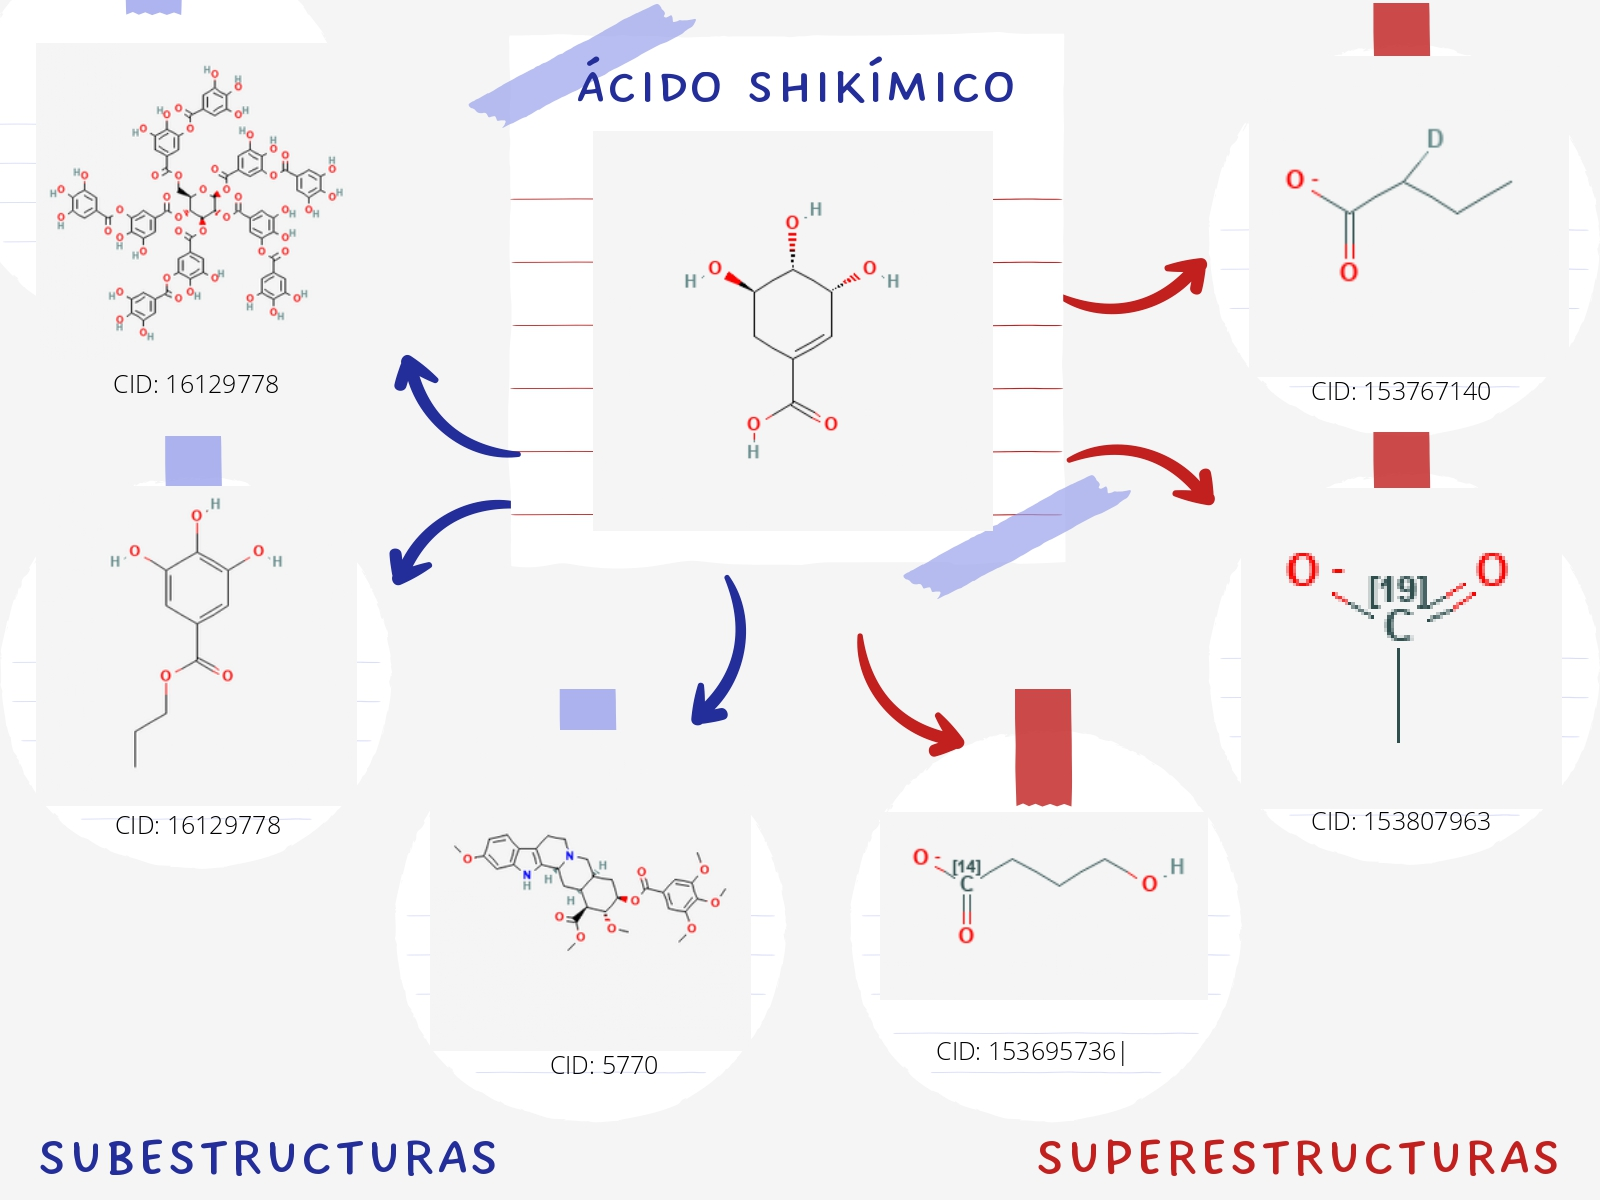

Obtener para el ácido shikímico por medio de su smile, el número de CIDs que posee en subestructura y superstructura.

In [ ]:
# input = '/compound/fastsubstructure/smiles/'
# operation = 'cids/'
# output = 'txt
# options= ?Stereo=exact'

query = 'C1C(C(C(C=C1C(=O)O)O)O)O'
mydata = { 'smiles' : query }
url = prolog + "/compound/fastsubstructure/smiles/cids/txt?Stereo=exact"
res = requests.post(url, data=mydata)
cids = res.text.split()
print("# Number of CIDs:", len(cids))
#print(cids)

# Number of CIDs: 38547


In [ ]:
# input = '/compound/fastsuperstructure/smiles/'
# operation = 'cids/'
# output = 'txt?Stereo=exact'

query = 'C1C(C(C(C=C1C(=O)O)O)O)O'
mydata = { 'smiles' : query }
url = prolog + "/compound/fastsuperstructure/smiles/cids/txt?Stereo=exact"
res = requests.post(url, data=mydata)
cids = res.text.split()
print("# Number of CIDs:", len(cids))
#print(cids)

# Number of CIDs: 2421


#Para saber más:

* Kim S, Chen J, Cheng T, Gindulyte A, He J, He S, Li Q, Shoemaker BA, Thiessen PA, Yu B, Zaslavsky L, Zhang J, Bolton EE (2023). PubChem 2023 update. Nucleic Acids Res. 51(D1):D1373-D1380. doi:10.1093/nar/gkac956.

* About PubChem. https://pubchem.ncbi.nlm.nih.gov/docs/about Fecha de acceso: Diciembre de 2023.

* Searching PubChem Using a Non-Textual Query (2019). Chemistry LibreTexts. Libretexts. https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/04%3A_Searching_Databases_for_Chemical_Information/4.04%3A_Searching_PubChem_Using_a_Non-Textual_Query. Fecha de acceso: Julio 2022

* Programming Topics (2019). Chemistry LibreTexts. Libretexts. https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/04%3A_Searching_Databases_for_Chemical_Information/4.05%3A_Programming_Topics. Fecha de acceso: Julio 2022.

* PubChem. “Pug Rest.” https://pubchem.ncbi.nlm.nih.gov/docs/pug-rest. Fecha de acceso; Julio 2023.

* Kim S, Thiessen PA, Bolton EE, Bryant SH. (2015) [PUG-SOAP and PUG-REST: web services for programmatic access to chemical information in PubChem](https://academic.oup.com/nar/article/43/W1/W605/2467896?login=false),* Nucleic Acids Res.* 43(W1) W605–W611.